<a href="https://colab.research.google.com/github/MadhurimaPaul-87/Machine_Learning/blob/main/Research_new.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from tensorflow.keras import backend as K
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img, img_to_array
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D,GlobalAveragePooling2D
from tensorflow.keras.layers import Activation, Dropout, BatchNormalization, Flatten, Dense, AvgPool2D,MaxPool2D
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.optimizers import Adam, SGD, RMSprop

import tensorflow as tf

import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
!ls gdrive/MyDrive/Covid_kaggle/dataset


covid  normal


In [5]:
DATASET_DIR='gdrive/MyDrive/Covid_kaggle/dataset'

In [6]:
os.listdir(DATASET_DIR)

['covid', 'normal']

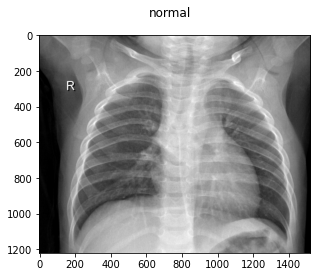

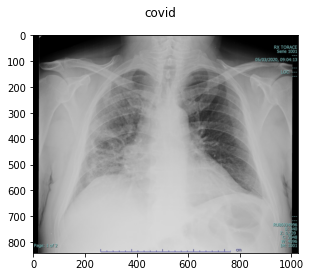

In [7]:
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

normal_images = []
for img_path in glob.glob(DATASET_DIR + '/normal/*'):
    normal_images.append(mpimg.imread(img_path))

fig = plt.figure()
fig.suptitle('normal')
plt.imshow(normal_images[0], cmap='gray') 

covid_images = []
for img_path in glob.glob(DATASET_DIR + '/covid/*'):
    covid_images.append(mpimg.imread(img_path))

fig = plt.figure()
fig.suptitle('covid')
plt.imshow(covid_images[0], cmap='gray') 

In [8]:
print(len(normal_images))
print(len(covid_images))

28
70


In [9]:
IMG_W = 150
IMG_H = 150
CHANNELS = 3

INPUT_SHAPE = (IMG_W, IMG_H, CHANNELS)
NB_CLASSES = 2
EPOCHS = 48
BATCH_SIZE = 6

Text(0.5, 1.0, 'Normal')

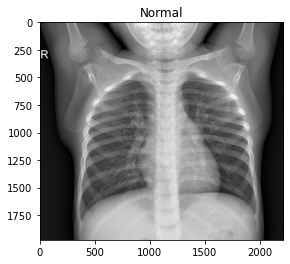

In [28]:
plt.imshow(normal_images[10], cmap='gray')
plt.title('Normal')

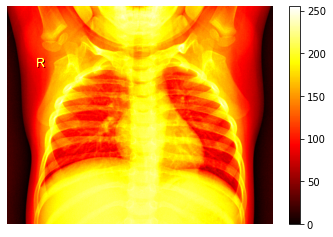

In [29]:
plt.imshow(normal_images[7], cmap='hot')
plt.axis('off')
plt.colorbar()

In [10]:
from tensorflow.keras import backend as K

def ALReLU(x):
   alpha = 0.01
   return K.maximum(K.abs(alpha*x), x)

from tensorflow.keras.layers import Input, Conv2D, Lambda
from tensorflow.keras.utils import get_custom_objects

get_custom_objects().update({'ALReLU':  tf.keras.layers.Activation(ALReLU)})



In [11]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=INPUT_SHAPE))
model.add(Activation(ALReLU))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation(ALReLU))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Conv2D(64,(3,3)))
model.add(Activation(ALReLU))
model.add(Conv2D(250,(3,3)))
model.add(Activation(ALReLU))
  
model.add(Conv2D(128,(3,3)))
model.add(Activation(ALReLU))
model.add(AvgPool2D(2,2))
model.add(Conv2D(64,(3,3)))
model.add(Activation(ALReLU))
model.add(AvgPool2D(2,2))

model.add(Conv2D(256,(2,2)))
model.add(Activation(ALReLU))
model.add(MaxPool2D(2,2))
    
model.add(Flatten())
model.add(Dense(32))
model.add(Dropout(0.25))
model.add(Dense(1))
model.add(Activation("sigmoid"))

In [12]:
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
activation_1 (Activation)    (None, 148, 148, 32)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 72, 72, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        1

In [14]:
train_datagen = ImageDataGenerator(rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.3)

train_generator = train_datagen.flow_from_directory(
    DATASET_DIR,
    target_size=(IMG_H, IMG_W),
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='training')

validation_generator = train_datagen.flow_from_directory(
    DATASET_DIR, 
    target_size=(IMG_H, IMG_W),
    batch_size=BATCH_SIZE,
    class_mode='binary',
    shuffle= False,
    subset='validation')

history = model.fit_generator(
    train_generator,
    steps_per_epoch = train_generator.samples // BATCH_SIZE,
    validation_data = validation_generator, 
    validation_steps = validation_generator.samples // BATCH_SIZE,
    epochs = EPOCHS)

Found 69 images belonging to 2 classes.
Found 29 images belonging to 2 classes.


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/48
11/11 [==============================] - 12s 900ms/step - loss: 0.7544 - accuracy: 0.5374 - val_loss: 0.3936 - val_accuracy: 0.8750
Epoch 2/48
11/11 [==============================] - 9s 837ms/step - loss: 0.6549 - accuracy: 0.7749 - val_loss: 0.5744 - val_accuracy: 0.8750
Epoch 3/48
11/11 [==============================] - 9s 801ms/step - loss: 0.6322 - accuracy: 0.6896 - val_loss: 0.3930 - val_accuracy: 0.8750
Epoch 4/48
11/11 [==============================] - 9s 811ms/step - loss: 0.7680 - accuracy: 0.6024 - val_loss: 0.5801 - val_accuracy: 0.8750
Epoch 5/48
11/11 [==============================] - 9s 833ms/step - loss: 1.1437 - accuracy: 0.8333 - val_loss: 0.5646 - val_accuracy: 0.8750
Epoch 6/48
11/11 [==============================] - 9s 802ms/step - loss: 0.6204 - accuracy: 0.6833 - val_loss: 0.5185 - val_accuracy: 0.8750
Epoch 7/48
11/11 [==============================] - 9s 799ms/step - loss: 0.5761 - accuracy: 0.7897 - val_loss: 0.5597 - val_accuracy: 0.8750
Epoch

**Evaluation CNN**

In [26]:
print("Accuracy Test -  ", model.evaluate(validation_generator)[1]*100, '%')

5/5 [==============================] - 2s 303ms/step - loss: 0.0245 - accuracy: 1.0000
Accuracy Test -   100.0 %


**Plotting the loss and accuracy**

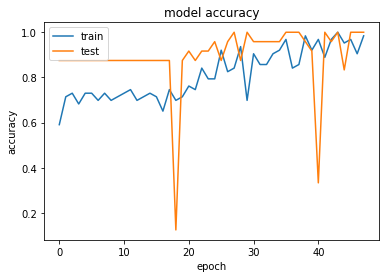

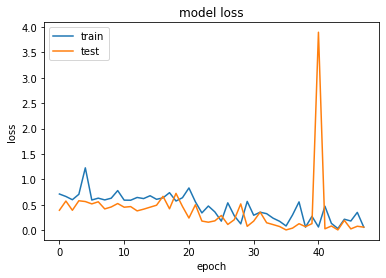

In [15]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [16]:
print("training_accuracy", history.history['accuracy'][-1])
print("validation_accuracy", history.history['val_accuracy'][-1])

training_accuracy 0.9841269850730896
validation_accuracy 1.0


In [17]:
label = validation_generator.classes

In [18]:
y_pred = model.predict(validation_generator)
y_pred = np.around(y_pred, decimals=0)

In [25]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(label, y_pred, target_names=['Covid-19','Normal']))

              precision    recall  f1-score   support

    Covid-19       1.00      1.00      1.00        21
      Normal       1.00      1.00      1.00         8

    accuracy                           1.00        29
   macro avg       1.00      1.00      1.00        29
weighted avg       1.00      1.00      1.00        29



In [20]:
pred= model.predict(validation_generator)
predicted_class_indices=np.argmax(pred,axis=1)
labels = (validation_generator.class_indices)
labels2 = dict((v,k) for k,v in labels.items())
predictions = [labels2[k] for k in predicted_class_indices]
print(predicted_class_indices)
print (labels)
print (predictions)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
{'covid': 0, 'normal': 1}
['covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid']


In [21]:
from sklearn.metrics import confusion_matrix

cf = confusion_matrix(predicted_class_indices,label)
cf

array([[21,  8],
       [ 0,  0]])

In [22]:
exp_series = pd.Series(label)
pred_series = pd.Series(predicted_class_indices)
pd.crosstab(exp_series, pred_series, rownames=['Actual'], colnames=['Predicted'],margins=True)

Predicted,0,All
Actual,,
0,21,21
1,8,8
All,29,29


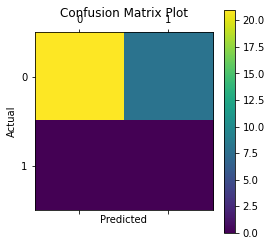

In [23]:
plt.matshow(cf)
plt.title('Confusion Matrix Plot')
plt.colorbar()
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show();

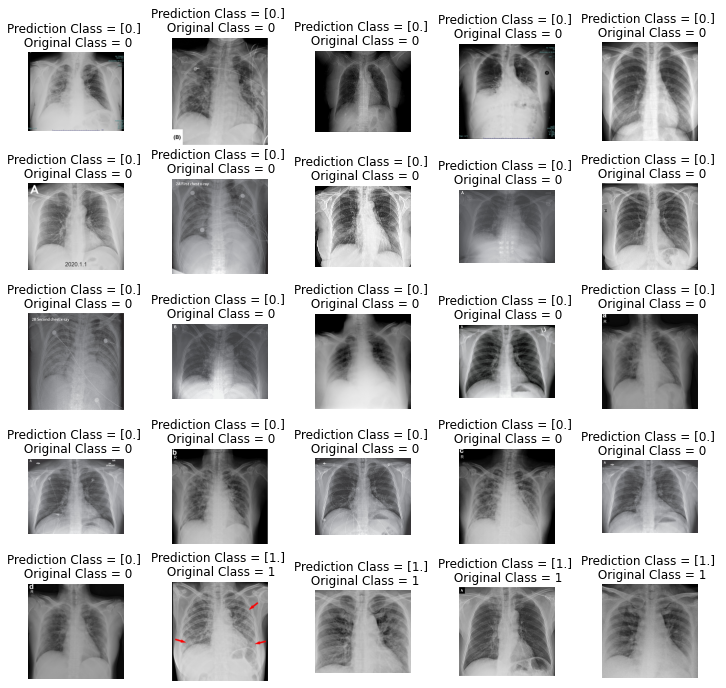

In [27]:
fig, axs = plt.subplots(5, 5, figsize=(12,12))
axs=axs.ravel()

for i in range(0,25):  
    axs[i].imshow(covid_images[i], cmap='gray')
    axs[i].set_title("Prediction Class = {} \n Original Class = {}".format(y_pred[i], label[i]))
    axs[i].axis('off')
plt.subplots_adjust(wspace=0.5)